In [43]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mip import Model, minimize, BINARY, CONTINUOUS, xsum  # For mixed-integer programming

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score,  r2_score

In [44]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [45]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [46]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [49]:
df.duplicated().sum()

0

In [50]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


<Axes: xlabel='Churn', ylabel='tenure'>

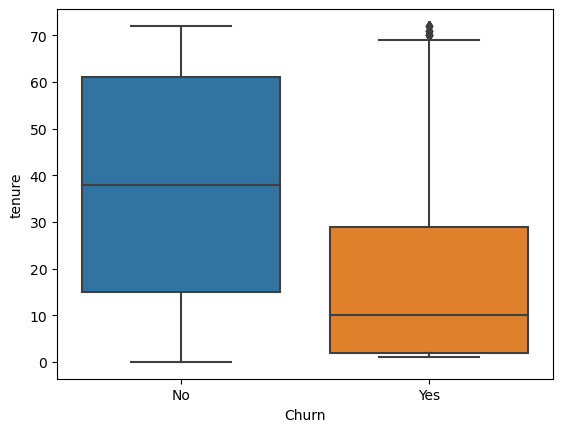

In [52]:
sns.boxplot(x='Churn', y='tenure', data=df)

In [53]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 0, 1: 1})

In [54]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1
7042,3186-AJIEK,1,0,0,0,66,1,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),105.65,6844.5,0


In [55]:
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod', 'InternetService', 
                                 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                                 'StreamingMovies'], drop_first=True) #For multi-category columns

In [56]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
7038,6840-RESVB,1,0,1,1,24,1,1,84.80,1990.5,...,False,False,False,True,False,True,False,True,False,True
7039,2234-XADUH,0,0,1,1,72,1,1,103.20,7362.9,...,False,True,False,True,False,False,False,True,False,True
7040,4801-JZAZL,0,0,1,1,11,0,1,29.60,346.45,...,False,False,False,False,False,False,False,False,False,False
7041,8361-LTMKD,1,1,1,0,4,1,1,74.40,306.6,...,False,False,False,False,False,False,False,False,False,False
7042,3186-AJIEK,1,0,0,0,66,1,1,105.65,6844.5,...,False,False,False,True,False,True,False,True,False,True


In [57]:
df.drop('customerID', axis=1, inplace=True)

In [58]:
# 80% train & 20% test

#random_state=42 keeps it reproducible.
#Check shapes: print(X_train.shape, X_test.shape) (e.g., ~5,625 train, ~1,407 test rows).

In [70]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  
print(df['TotalCharges'].isnull().sum())
df.dropna(subset=['TotalCharges'], inplace=True)  # Drop those 11 rows

0


In [71]:
X = df.drop('Churn', axis=1)
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
print(df.dtypes)  # All should be int/float/uint8 (from dummies)
print(df.isnull().sum())  # All 0s

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes  

In [74]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [75]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.7875


In [76]:
#Accuracy: 78% means your model correctly predicts churn (or no churn) for 78 out of 100 test cases.
#You’ve cleaned the data, encoded categories, split it into train/test sets, and trained a logistic regression model successfully.

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



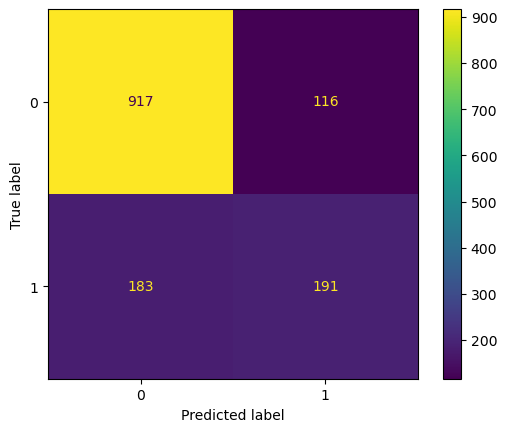

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))  # Precision, recall, F1-score
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f"Scaled Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Scaled Accuracy: 0.7868


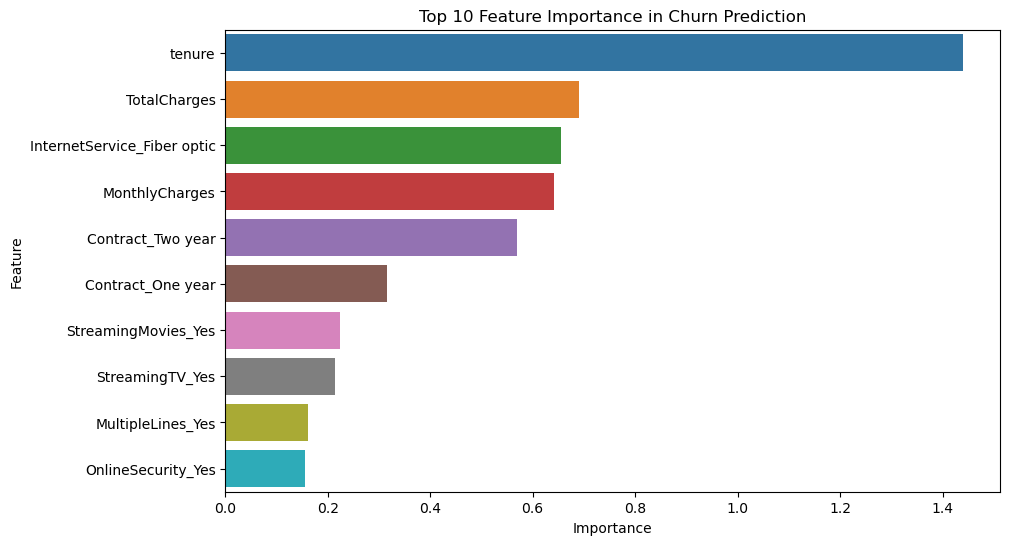

                        Feature  Importance
4                        tenure    1.440697
8                  TotalCharges    0.689707
14  InternetService_Fiber optic    0.654429
7                MonthlyCharges    0.641328
10            Contract_Two year    0.569206


In [68]:
# Create a DataFrame with feature names and their importance (absolute coefficients)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance in Churn Prediction')
plt.show()

# Print the top 5 for reference
print(feature_importance.head(5))

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f"Scaled Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Scaled Logistic Regression Accuracy: 0.7868
